Clean initial MH + CSSRS data

In [26]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# --- 1. Read Excel ---
file_path = "~/Sue Goldie Dropbox/Jacob Jameson/DBH data/MH SA.xlsx"
mh_sa = pd.read_excel(file_path)

# --- 2. Clean column names ---
mh_sa.columns = (
    mh_sa.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[^\w]+", "_", regex=True)  # replace spaces/punctuation with _
)

In [27]:
rename_map = {
    # Identifiers
    "evaluation_date": "eval_date",
    "master_id": "masterid",
    "admission_date": "admit_date",
    "discharge_date": "discharge_date",
    "date_": "record_date",

    # Core C-SSRS questions
    "1_wish_to_be_dead_have_you_wished_you_were_dead_or_wished_you_could_go_to_sleep_and_not_wake_up_": "q1_wish_dead",
    "2_current_suicidal_thoughts_have_you_actually_had_any_thoughts_of_killing_yourself_": "q2_suicidal_thoughts",
    "3_suicidal_thoughts_with_method_with_no_specific_plan_or_intent_or_act_have_you_been_thinking_about_how_you_might_do_this_": "q3_method_no_plan",
    "4_suicidal_intent_without_specific_plan_have_you_had_these_thoughts_and_had_some_intention_of_acting_on_them_": "q4_intent_no_plan",
    "5_intent_with_plan_have_you_started_to_work_out_or_worked_out_the_details_of_how_to_kill_yourself_do_you_intend_to_carry_out_this_plan_": "q5_intent_with_plan",
    "6a_c_ssrs_suicidal_behavior_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_br_br_i_examples_collected_pills_obtained_a_gun_gave_away_valuables_wrote_a_will_or_suicide_note_took_out_pills_but_didn_t_swallow_any_held_a_gun_but_changed_your_mind_or_it_was_grabbed_from_your_hand_went_to_the_roof_but_didn_t_jump_or_actually_took_pills_tried_to_shoot_yourself_cut_yourself_tried_to_hang_yourself_etc_i_": "q6a_behavior",
    "6b_if_yes_was_it_within_the_past_3_months_": "q6b_within_3mo",

    # Variants of C-SSRS denials/NA
    "have_you_wished_you_were_dead_or_wished_you_could_go_to_sleep_and_not_wake_up_no_past_month_": "q1_no_past_month",
    "have_you_been_thinking_about_how_you_might_do_this_no_past_month_": "q3_no_past_month",
    "have_you_had_these_thoughts_and_had_some_intention_of_acting_on_them_no_past_month_": "q4_no_past_month",
    "have_you_started_to_work_out_or_worked_out_the_details_of_how_to_kill_yourself_no_past_month_": "q5_no_past_month",
    "do_you_intend_to_carry_out_this_plan_no": "q5_no_intent",
    "6a_c_ssrs_suicidal_behavior_strong_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_denies": "q6a_behavior_denies",
    "6_c_ssrs_suicidal_behavior_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_no_lifetime_": "q6_behavior_no_lifetime1",
    "c_ssrs_suicidal_behavior_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_no_lifetime_": "q6_behavior_no_lifetime2",
    "6b_if_yes_was_it_within_the_past_3_months_denies": "q6b_denies",
    "_if_yes_was_it_within_the_past_3_months_n_a": "q6b_na",

    # Diagnoses
    "current_and_past_psychiatric_diagnoses_mood_disorder": "dx_mood",
    "current_and_past_psychiatric_diagnoses_psychotic_disorder": "dx_psychotic",
    "current_and_past_psychiatric_diagnoses_alcohol_substance_use_disorders": "dx_substance",
    "current_and_past_psychiatric_diagnoses_post_traumatic_stress_disorder_ptsd_": "dx_ptsd",
    "current_and_past_psychiatric_diagnoses_attention_deficit_hyperactivity_disorder_adhd_": "dx_adhd",
    "current_and_past_psychiatric_diagnoses_traumatic_brain_injury_tbi_": "dx_tbi",
    "current_and_past_psychiatric_diagnoses_cluster_b_personality_disorders_or_traits_e_g_borderline_antisocial_histrionic_narcissistic_": "dx_clusterb",
    "current_and_past_psychiatric_diagnoses_conduct_problems_e_g_antisocial_behavior_aggression_impulsivity_": "dx_conduct",
    "current_and_past_psychiatric_diagnoses_recent_onset_of_diagnosis": "dx_recent",
    "current_and_past_psychiatric_diagnoses_none": "dx_none",

    # Presenting symptoms
    "presenting_symptoms_anhedonia_lack_of_pleasure_": "symp_anhedonia",
    "presenting_symptoms_impulsivity": "symp_impulsivity",
    "presenting_symptoms_hopelessness_or_despair": "symp_hopeless",
    "presenting_symptoms_anxiety_and_or_panic": "symp_anxiety",
    "presenting_symptoms_insomnia": "symp_insomnia",
    "presenting_symptoms_command_hallucinations": "symp_cmd_halluc",
    "presenting_symptoms_psychosis": "symp_psychosis",
    "presenting_symptoms_none": "symp_none",

    # Family history
    "family_history_suicide": "fam_suicide",
    "family_history_suicidal_behavior": "fam_suicidal_behavior",
    "family_history_psychiatric_diagnoses_requiring_hospitalization": "fam_psych_hosp",
    "family_history_none": "fam_none",

    # Stressors
    "precipitants_stressors_triggering_events_leading_to_humiliation_shame_and_or_despair_e_g_loss_of_relationship_financial_or_health_status_": "precip_triggering",
    "precipitants_stressors_chronic_physical_pain_or_other_acute_medical_problem_e_g_cns_disorders_": "precip_pain_medical",
    "precipitants_stressors_sexual_physical_abuse": "precip_abuse",
    "precipitants_stressors_substance_intoxication_or_withdrawal": "precip_substance",
    "precipitants_stressors_pending_incarceration_or_homelessness": "precip_incarc_homeless",
    "precipitants_stressors_legal_problems": "precip_legal",
    "precipitants_stressors_inadequate_social_supports": "precip_low_support",
    "precipitants_stressors_social_isolation": "precip_isolation",
    "precipitants_stressors_perceived_burden_on_others": "precip_burden",
    "precipitants_stressors_none": "precip_none",

    # Change in treatment
    "change_in_treatment_recent_inpatient_discharge": "treat_recent_discharge",
    "change_in_treatment_change_in_provider_or_treatment_e_g_medications_psychotherapy_milieu_": "treat_change_provider",
    "change_in_treatment_hopeless_or_dissatisfied_with_provider_or_treatment": "treat_dissatisfied",
    "change_in_treatment_non_compliant_or_not_receiving_treatment": "treat_noncompliant",
    "change_in_treatment_none": "treat_none",

    # Lethal means
    "access_to_lethal_methods_does_patient_have_access_to_means_including_firearms_in_the_home_": "access_lethal_means",

    # Protective factors
    "internal_protective_factors_ability_to_cope_with_stress": "prot_int_cope",
    "internal_protective_factors_frustration_tolerance": "prot_int_frustration",
    "internal_protective_factors_religious_beliefs": "prot_int_religion",
    "internal_protective_factors_fear_of_death_or_the_actual_act_of_killing_self": "prot_int_fear_death",
    "internal_protective_factors_identifies_reasons_for_living": "prot_int_reasons",
    "internal_protective_factors_problem_solving_skills": "prot_int_problem_solving",
    "internal_protective_factors_able_to_access_care_willing_to_reach_out": "prot_int_access_care",

    "external_protective_factors_cultural_spiritual_and_or_moral_attitudes_against_suicide": "prot_ext_cultural",
    "external_protective_factors_responsibility_to_children": "prot_ext_children",
    "external_protective_factors_beloved_pets": "prot_ext_pets",
    "external_protective_factors_supportive_social_network_of_family_or_friends": "prot_ext_network",
    "external_protective_factors_positive_therapeutic_relationships": "prot_ext_therapeutic",
    "external_protective_factors_engaged_in_work_school_or_sports": "prot_ext_engaged",
    "external_protective_factors_high_academic_achievement": "prot_ext_academic",

    # Score
    "total_score": "score",

    # Risk/judgment fields
    "based_on_patient_s_responses_in_step_1_and_the_risk_level_guideline_provided_select_the_determined_b_risk_level_b_for_the_patient_": "risk_guideline",
    "does_your_clinical_judgment_change_patient_s_level_of_risk_that_was_determined_by_the_risk_level_guideline_": "risk_judgment_change1",
    "does_your_clinical_judgment_change_patient_s_level_of_risk_that_was_determined_by_the_risk_level_guideline_1": "risk_judgment_change2",
    "final_b_risk_level_b_including_any_change_based_on_clinical_judgment_if_applicable_u_": "risk_final",
    "risk_level_": "risk_level",
    "please_click_here_for_high_risk_level_if_applicable_": "risk_high_click",
    "please_click_here_for_moderate_risk_level_if_applicable_": "risk_mod_click",
    "please_click_here_for_low_risk_level_if_applicable_": "risk_low_click",

    # Staff/review
    "staff_signature_1": "staff_sig1",
    "staff_signature_2": "staff_sig2",
    "staff_signature_3": "staff_sig3",
    "staff_signature_4": "staff_sig4",
    "review_signature_1": "review_sig1",
    "review_signature_2": "review_sig2",
    "review_signature_3": "review_sig3",
    "review_signature_4": "review_sig4",
}

# --- Apply renaming ---
mh_sa = mh_sa.rename(columns=rename_map)

In [28]:
# --- Helper to check if a field is flagged ---
def is_flagged(x):
    if pd.isna(x):
        return False
    x = str(x).strip().lower()
    return not (x == "" or x in ["na", "n/a"])

def derive_risk_rstyle(row):
    # Priority 1: button clicks
    if is_flagged(row.get("risk_low_click")):
        return "Low"
    if is_flagged(row.get("risk_mod_click")):
        return "Moderate"
    if is_flagged(row.get("risk_high_click")):
        return "High"

    # Priority 2: free-text field
    txt = row.get("risk_level")
    if pd.notna(txt):
        t = str(txt).lower()
        if "low" in t:
            return "Low"
        elif "moderate" in t:
            return "Moderate"
        elif "high" in t:
            return "High"

    return np.nan

mh_sa["risk_level_initial"] = mh_sa.apply(derive_risk_rstyle, axis=1)

mh_sa["risk_level_initial"] = pd.Categorical(
    mh_sa["risk_level_initial"],
    categories=["Low", "Moderate", "High"],
    ordered=True
)

print(mh_sa["risk_level_initial"].value_counts(dropna=False))

risk_level_initial
Moderate    5048
Low         4875
High        1870
NaN          134
Name: count, dtype: int64


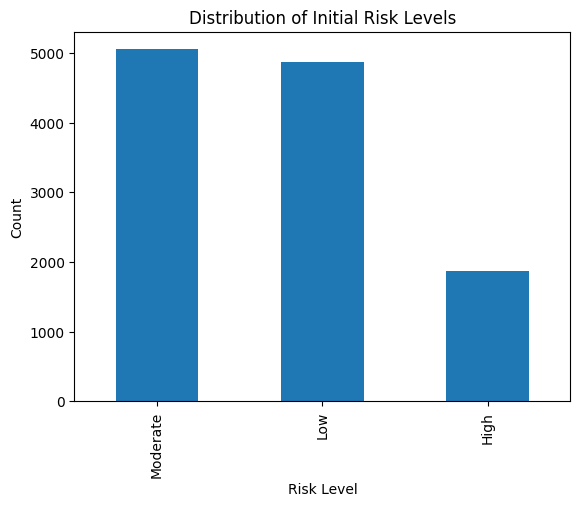

Total records: 11927


In [32]:
mh_sa["risk_level_initial"].value_counts().plot(kind='bar')
plt.title("Distribution of Initial Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()
total_records = len(mh_sa)
print(f"Total records: {total_records}")

In [29]:
# --- Read and normalize ---
srs_path = "~/Sue Goldie Dropbox/Jacob Jameson/DBH data/MH SRS.xlsx"
srs = pd.read_excel(srs_path)
srs.columns = (
    srs.columns.str.strip().str.lower()
    .str.replace(r"[^\w]+", "_", regex=True)
)

# --- Rename exactly as in your R ---
srs = srs.rename(columns={
    "evaluation_date": "final_eval_date",
    "master_id": "masterid",
    "admission_date": "admit_date",
    "discharge_date": "discharge_date",
    "final_b_risk_level_b_including_any_change_based_on_clinical_judgment_if_applicable_u_": "raw_risk_level",
    "documentation_follow_up_create_resolve_urgent_issue_red_flag_in_emr_high_risk_": "high_risk_flag1",
    "documentation_follow_up_create_suicide_risk_treatment_plan_high_risk_": "high_risk_flag2",
    "documentation_follow_up_include_suicide_risk_reduction_interventions_in_appropriate_treatment_plan_moderate_risk_": "moderate_risk_flag",
    "documentation_follow_up_n_a_only_applicable_if_low_risk_": "low_risk_flag",
})

# --- Types ---
srs["final_eval_date"] = pd.to_datetime(srs["final_eval_date"], errors="coerce")
srs["admit_date"]      = pd.to_datetime(srs["admit_date"], errors="coerce")
srs["discharge_date"]  = pd.to_datetime(srs["discharge_date"], errors="coerce")

def yes_flag(x):
    if pd.isna(x): return False
    return str(x).strip().lower() in {"true","t","yes","y","1"}

for c in ["high_risk_flag1","high_risk_flag2","moderate_risk_flag","low_risk_flag"]:
    srs[c] = srs.get(c, pd.Series(False, index=srs.index)).map(yes_flag)

# --- Map raw risk text → Low/Moderate/High (RISK_LEVEL_MAPPINGS) ---
txt = srs["raw_risk_level"].astype(str).str.strip().str.lower()
map_dict = {
    "low suicide risk": "Low",
    "moderate suicide risk": "Moderate",
    "high suicide risk": "High",
}
srs["initial_risk_level"] = txt.map(map_dict).astype("object")

# --- Flag-based risk (priority: High > Moderate > Low) with object dtype ---
flag_based = pd.Series(pd.NA, index=srs.index, dtype="object")
flag_based = flag_based.mask(srs["low_risk_flag"], "Low")
flag_based = flag_based.mask(srs["moderate_risk_flag"], "Moderate")
flag_based = flag_based.mask(srs["high_risk_flag1"] | srs["high_risk_flag2"], "High")
srs["flag_based_risk"] = flag_based

# --- Coalesce exactly like R ---
srs["risk_level"] = srs["initial_risk_level"].where(srs["initial_risk_level"].notna(), srs["flag_based_risk"])
srs["risk_level"] = pd.Categorical(srs["risk_level"], categories=["Low","Moderate","High"], ordered=True)

# --- Drop helpers and sort, matching R intent ---
srs = srs.drop(columns=["raw_risk_level","high_risk_flag1","high_risk_flag2","moderate_risk_flag","low_risk_flag",
                        "initial_risk_level","flag_based_risk"])
srs = srs.sort_values(["masterid","admit_date","final_eval_date"])

# Quick check
print(srs["risk_level"].value_counts(dropna=False))
print(srs[["masterid","admit_date","final_eval_date","risk_level"]].head())

srs = srs[["masterid", "admit_date", "discharge_date", "final_eval_date", "risk_level"]]

risk_level
Low         10806
Moderate    10550
High         4023
NaN           604
Name: count, dtype: int64
                                   masterid admit_date     final_eval_date  \
8017   0009f7ed-2349-4f4a-9b04-9b194ff434ea 2023-08-29 2023-09-01 14:25:00   
17430  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-23 14:10:00   
17440  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-28 20:08:00   
17434  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-29 15:05:00   
17435  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-30 14:18:00   

      risk_level  
8017         Low  
17430        Low  
17440       High  
17434       High  
17435       High  


In [30]:
# --- Ensure consistent types ---
for df in [mh_sa]:
    df["admit_date"] = pd.to_datetime(df["admit_date"], errors="coerce")
    df["discharge_date"] = pd.to_datetime(df["discharge_date"], errors="coerce")
    df["risk_level_initial"] = pd.Categorical(df["risk_level_initial"],
                                              categories=["Low","Moderate","High"], ordered=True)

srs["final_eval_date"] = pd.to_datetime(srs["final_eval_date"], errors="coerce")
srs["admit_date"]      = pd.to_datetime(srs["admit_date"], errors="coerce")
srs["discharge_date"]  = pd.to_datetime(srs["discharge_date"], errors="coerce")
srs["risk_level"]      = pd.Categorical(srs["risk_level"],
                                        categories=["Low","Moderate","High"], ordered=True)

# --- Merge initial risk into SRS (scores) ---
scores = mh_sa.loc[:, ["masterid","admit_date","risk_level_initial"]].copy()
srs = srs.merge(scores, on=["masterid","admit_date"], how="left")

# --- Compute days_to_first_drop and days_until_low (faithful to R) ---
def add_drop_metrics(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("final_eval_date")
    admit = g["admit_date"].iloc[0]
    init  = g["risk_level_initial"].iloc[0]

    # days_until_low
    low_mask = (g["risk_level"] == "Low")
    if low_mask.any():
        first_low_date = g.loc[low_mask, "final_eval_date"].iloc[0]
        days_until_low = (first_low_date - admit).days
    else:
        days_until_low = pd.NA

    # days_to_first_drop: first time risk < initial
    if pd.isna(init):
        days_to_first_drop = pd.NA
    else:
        init_code = pd.Categorical([init], categories=["Low","Moderate","High"], ordered=True).codes[0]
        risk_codes = g["risk_level"].cat.codes  # -1 for NaN
        drop_mask = risk_codes < init_code
        if (drop_mask & (risk_codes != -1)).any():
            first_drop_date = g.loc[drop_mask, "final_eval_date"].iloc[0]
            days_to_first_drop = (first_drop_date - admit).days
        else:
            days_to_first_drop = pd.NA

        # If initial == Low, replace with days_until_low when available (R line)
        if init == "Low" and not pd.isna(days_until_low):
            days_to_first_drop = days_until_low

    g["days_to_first_drop"] = days_to_first_drop
    g["days_until_low"] = days_until_low
    return g

srs = srs.groupby(["masterid","admit_date"], group_keys=False).apply(add_drop_metrics)

# --- Keep most recent rescreen per episode, add counts ---
srs = srs.sort_values(["masterid","admit_date","final_eval_date"], ascending=[True, True, False]).copy()
srs["rescreens"] = srs.groupby(["masterid","admit_date"])["final_eval_date"].transform("size")
srs_last = srs.groupby(["masterid","admit_date"], as_index=False).head(1).copy()

# --- Final fields and durations ---
srs_last = srs_last.rename(columns={"risk_level": "risk_level_discharge"})
srs_last["admit_to_last_cssrs"] = (srs_last["final_eval_date"] - srs_last["admit_date"]).dt.days
srs_last["cssrs_to_discharge"]  = (srs_last["discharge_date"] - srs_last["final_eval_date"]).dt.days

# --- Merge back to mh_sa as in R (by masterid, admit_date, discharge_date, risk_level_initial) ---
sa = srs_last.merge(
    mh_sa,
    on=["masterid","admit_date","discharge_date","risk_level_initial"],
    how="left"
).sort_values(["masterid","admit_date"])

# Quick sanity checks
print(sa[["risk_level_initial","risk_level_discharge"]].value_counts(dropna=False).head())
print(sa[["rescreens","days_to_first_drop","days_until_low","admit_to_last_cssrs","cssrs_to_discharge"]].describe(include="all"))

risk_level_initial  risk_level_discharge
Moderate            Low                     3583
High                Low                     1164
Low                 Low                      962
Moderate            Moderate                 534
High                Moderate                 314
Name: count, dtype: int64
          rescreens  days_to_first_drop  days_until_low  admit_to_last_cssrs  \
count   7733.000000              6667.0          6531.0          7733.000000   
unique          NaN               120.0           134.0                  NaN   
top             NaN                 1.0             7.0                  NaN   
freq            NaN              1114.0           814.0                  NaN   
mean       3.545972                 NaN             NaN            28.143282   
std        4.278897                 NaN             NaN            31.317239   
min        1.000000                 NaN             NaN           -22.000000   
25%        1.000000                 NaN         

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# --- Order: top → bottom
risk_order = ["High", "Moderate", "Low"]

# Build flows from sa
df = sa.loc[
    sa["risk_level_initial"].isin(risk_order) & sa["risk_level_discharge"].isin(risk_order),
    ["risk_level_initial","risk_level_discharge"]
].copy()

flows = (
    df.groupby(["risk_level_initial","risk_level_discharge"])
      .size().reset_index(name="count")
)
total = int(flows["count"].sum())
flows["pct_total"] = flows["count"] / total
flows["pct_within_initial"] = flows["count"] / flows.groupby("risk_level_initial")["count"].transform("sum")

# Node labels and indices
left_labels  = [f"{c} (initial)"   for c in risk_order]
right_labels = [f"{c} (discharge)" for c in risk_order]
nodes = left_labels + right_labels
idx = {c:i for i,c in enumerate(risk_order)}

flows["source"] = flows["risk_level_initial"].map(idx).astype(int)
flows["target"] = flows["risk_level_discharge"].map(lambda c: idx[c] + len(risk_order)).astype(int)
flows["value"]  = flows["count"].astype(float)

# Colors
risk_rgb = {"Low":"rgba(44,160,44,0.70)","Moderate":"rgba(255,127,14,0.70)","High":"rgba(214,39,40,0.70)"}
node_colors = [risk_rgb[c] for c in risk_order] + [risk_rgb[c] for c in risk_order]
link_colors = flows["risk_level_initial"].astype(str).map({
    "Low":"rgba(44,160,44,0.35)","Moderate":"rgba(255,127,14,0.35)","High":"rgba(214,39,40,0.35)"
}).tolist()

# Hover text
flows["hover"] = (
    flows["risk_level_initial"].astype(str) + " → " + flows["risk_level_discharge"].astype(str) +
    "<br><b>n = " + flows["count"].map("{:,}".format) + "</b>" +
    "<br>% of total = " + (100*flows["pct_total"]).round(1).astype(str) + "%" +
    "<br>% within initial = " + (100*flows["pct_within_initial"]).round(1).astype(str) + "%"
)

# Fix node positions: High top, Moderate middle, Low bottom
x_left,  x_right = [0.10]*3, [0.90]*3
y_left,  y_right = [0.05, 0.50, 0.95], [0.05, 0.50, 0.95]  # High, Moderate, Low

fig = go.Figure(data=[go.Sankey(
    arrangement="fixed",
    node=dict(
        pad=20, thickness=20,
        line=dict(color="rgba(0,0,0,0.25)", width=0.6),
        label=nodes, color=node_colors,
        x=x_left + x_right, y=y_left + y_right
    ),
    link=dict(
        source=flows["source"].tolist(),
        target=flows["target"].tolist(),
        value=flows["value"].tolist(),
        color=link_colors,
        hovertemplate="%{customdata}<extra></extra>",
        customdata=flows["hover"].tolist()
    )
)])

# Wider canvas and larger margins to avoid cutoff
fig.update_layout(
    title=f"Initial → Discharge Suicide Risk Flow (n={total:,})",
    font=dict(size=13),
    width=1200, height=620,
    margin=dict(l=0, r=80, t=80, b=130),
)

fig.show()

# --- Static export (PNG/SVG) ---
# pip install -q kaleido  # run once in your env
# Save high-res PNG
#pio.write_image(fig, "risk_sankey.png", format="png", scale=2, width=1100, height=620)
# Or vector SVG
#pio.write_image(fig, "risk_sankey.svg", format="svg", width=1100, height=620)

Saved: risk_sankey.png and risk_sankey.svg


In [ ]:
pn_path = "~/Sue Goldie Dropbox/Jacob Jameson/DBH data/MH PN.xlsx"
pn = pd.read_excel(pn_path)
pn.columns = (
    pn.columns.str.strip().str.lower()
      .str.replace(r"[^\w]+", "_", regex=True)
)

# Dates
pn = pn.rename(columns={"evaluation_date": "pn_eval_date", "master_id": "masterid"})
pn["pn_eval_date"] = pd.to_datetime(pn["pn_eval_date"], errors="coerce")

# Therapist name = text before first comma in staff_signature_1
def extract_name(x):
    if pd.isna(x): return pd.NA
    m = re.match(r"\s*([^,]+)\s*,", str(x))
    return m.group(1).strip() if m else str(x).strip()

pn["therapist_name"] = pn.get("staff_signature_1", pd.Series(index=pn.index, dtype="object")).map(extract_name)

Empty DataFrame
Columns: [masterid, pn_first_date, therapist_name_first, first_therapy_modalities]
Index: []
{'n_people_with_first_session': 0}


In [57]:
# --- bring in admit/discharge windows from sa ---
episodes = sa[["masterid","admit_date","discharge_date"]].drop_duplicates()

# ensure proper datetime
episodes["admit_date"] = pd.to_datetime(episodes["admit_date"], errors="coerce")
episodes["discharge_date"] = pd.to_datetime(episodes["discharge_date"], errors="coerce")

# --- join pn to all episodes for same masterid ---
pn_with_dates = pn.merge(episodes, on="masterid", how="left")

# keep only rows where the PN falls between admit and discharge
pn_with_dates = pn_with_dates[
    (pn_with_dates["pn_eval_date"] >= pn_with_dates["admit_date"]) &
    (pn_with_dates["pn_eval_date"] <= pn_with_dates["discharge_date"])
].copy()

print(pn_with_dates[["masterid","pn_eval_date","admit_date","discharge_date","therapist_name"]].head())
print(f"Rows after filtering: {len(pn_with_dates)}")

                               masterid        pn_eval_date admit_date  \
0  382932a1-999f-46bd-87c5-6ebb0bc680b0 2021-06-01 13:11:00 2021-05-13   
1  c811d635-148d-4c98-b763-59954eeff3db 2022-09-29 10:36:00 2022-09-20   
2  7183eca4-b61f-44e8-9d02-10664133f4e8 2022-10-20 11:46:00 2022-10-10   
4  18505ea2-f098-4157-8663-b79e9f6aae8a 2023-02-21 11:43:00 2023-02-10   
8  370a7233-cf41-4cb1-ae4c-b8458176ff4d 2021-02-03 14:30:00 2020-12-31   

  discharge_date    therapist_name  
0     2021-06-03        Maria Aziz  
1     2022-12-12     Aleshea Jones  
2     2022-11-15                    
4     2023-06-30                    
8     2021-03-26  Takeesha Hawkins  
Rows after filtering: 90890


In [58]:
# --- keep only the first PN per (masterid, admit_date, discharge_date) ---
first_pn = (
    pn_with_dates
    .sort_values(["masterid", "admit_date", "pn_eval_date"])  # order chronologically
    .groupby(["masterid", "admit_date", "discharge_date"], as_index=False)
    .first()  # take the first row in each episode
)

# keep only relevant fields
first_pn = first_pn[[
    "masterid",
    "admit_date",
    "discharge_date",
    "pn_eval_date",
    "therapist_name",
    # modalities of interest
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_"
]]

print(first_pn.head())
print(f"First-session rows: {len(first_pn)}")

                               masterid admit_date discharge_date  \
0  0009f7ed-2349-4f4a-9b04-9b194ff434ea 2023-08-29     2023-09-18   
1  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22     2021-05-10   
2  00178ab1-b7ac-43b2-a190-94924191948a 2022-05-26     2022-07-06   
3  001988a9-62ae-4ce0-a1a2-84e8c7be1f48 2022-11-29     2023-02-17   
4  001ef185-374e-4052-8f0d-5b7665f9de9c 2022-08-10     2022-09-30   

         pn_eval_date          therapist_name  \
0 2023-09-01 11:00:00            Tianna McIff   
1 2021-03-23 11:30:00        Jessica Yukihiro   
2 2022-06-01 11:30:00          Martha Ramirez   
3 2022-12-08 14:30:00  Lola (Sarah) Schwitkis   
4 2022-08-12 12:30:00        Delphine Chollet   

   evidence_based_modalities_employed_act  \
0                                     0.0   
1                                     NaN   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   evidence_based_m

In [98]:
# --- Merge first-session PN data into SA data ---
final = (
    sa.merge(
        first_pn,
        on=["masterid", "admit_date", "discharge_date"],  # align within episodes
        how="left"  # keep all SA episodes, even if no PN found
    )
)

print(final.head())
print(final.shape)

# Quick check: how many episodes have first-session data attached?
print(final["therapist_name"].notna().mean(), "proportion with PN info")

                               masterid admit_date discharge_date  \
0  0009f7ed-2349-4f4a-9b04-9b194ff434ea 2023-08-29     2023-09-18   
1  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22     2021-05-10   
2  00178ab1-b7ac-43b2-a190-94924191948a 2022-05-26     2022-07-06   
3  001988a9-62ae-4ce0-a1a2-84e8c7be1f48 2022-11-29     2023-02-17   
4  001ef185-374e-4052-8f0d-5b7665f9de9c 2022-08-10     2022-09-30   

      final_eval_date risk_level_discharge risk_level_initial  \
0 2023-09-01 14:25:00                  Low           Moderate   
1 2021-04-29 14:33:00                  Low               High   
2 2022-07-05 15:26:00                  Low           Moderate   
3 2022-12-27 15:24:00                  Low           Moderate   
4 2022-09-27 12:37:00             Moderate           Moderate   

  days_to_first_drop days_until_low  rescreens  admit_to_last_cssrs  ...  \
0                  3              3          1                    3  ...   
1                  1              1       

In [ ]:
therapy_cols = [
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_",
]

# Convert NaN → 0, then cast to int
final[therapy_cols] = final[therapy_cols].fillna(0).astype(int)

print(final[therapy_cols].dtypes)
print(final[therapy_cols].head())

evidence_based_modalities_employed_act                                     int64
evidence_based_modalities_employed_cbt                                     int64
evidence_based_modalities_employed_dbt                                     int64
evidence_based_modalities_employed_motivational_interviewing               int64
evidence_based_modalities_employed_mindfulness_techniques                  int64
evidence_based_modalities_employed_stages_of_change                        int64
evidence_based_modalities_employed_family_systems                          int64
evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_    int64
dtype: object
   evidence_based_modalities_employed_act  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   evidence_based_modalities_employed_cbt  \
0                     

In [105]:
# filter out any rows where modalities are not recorded (all zeros)
final = final[final[therapy_cols].sum(axis=1) > 0].copy()
print(f"Rows after filtering out no-therapy: {len(final)}")

Rows after filtering out no-therapy: 5566


In [111]:
# filter out any rows where initial risk is Low
final = final[final["risk_level_initial"] != "Low"].copy()
print(f"Rows after filtering out initial Low risk: {len(final)}")

Rows after filtering out initial Low risk: 4693


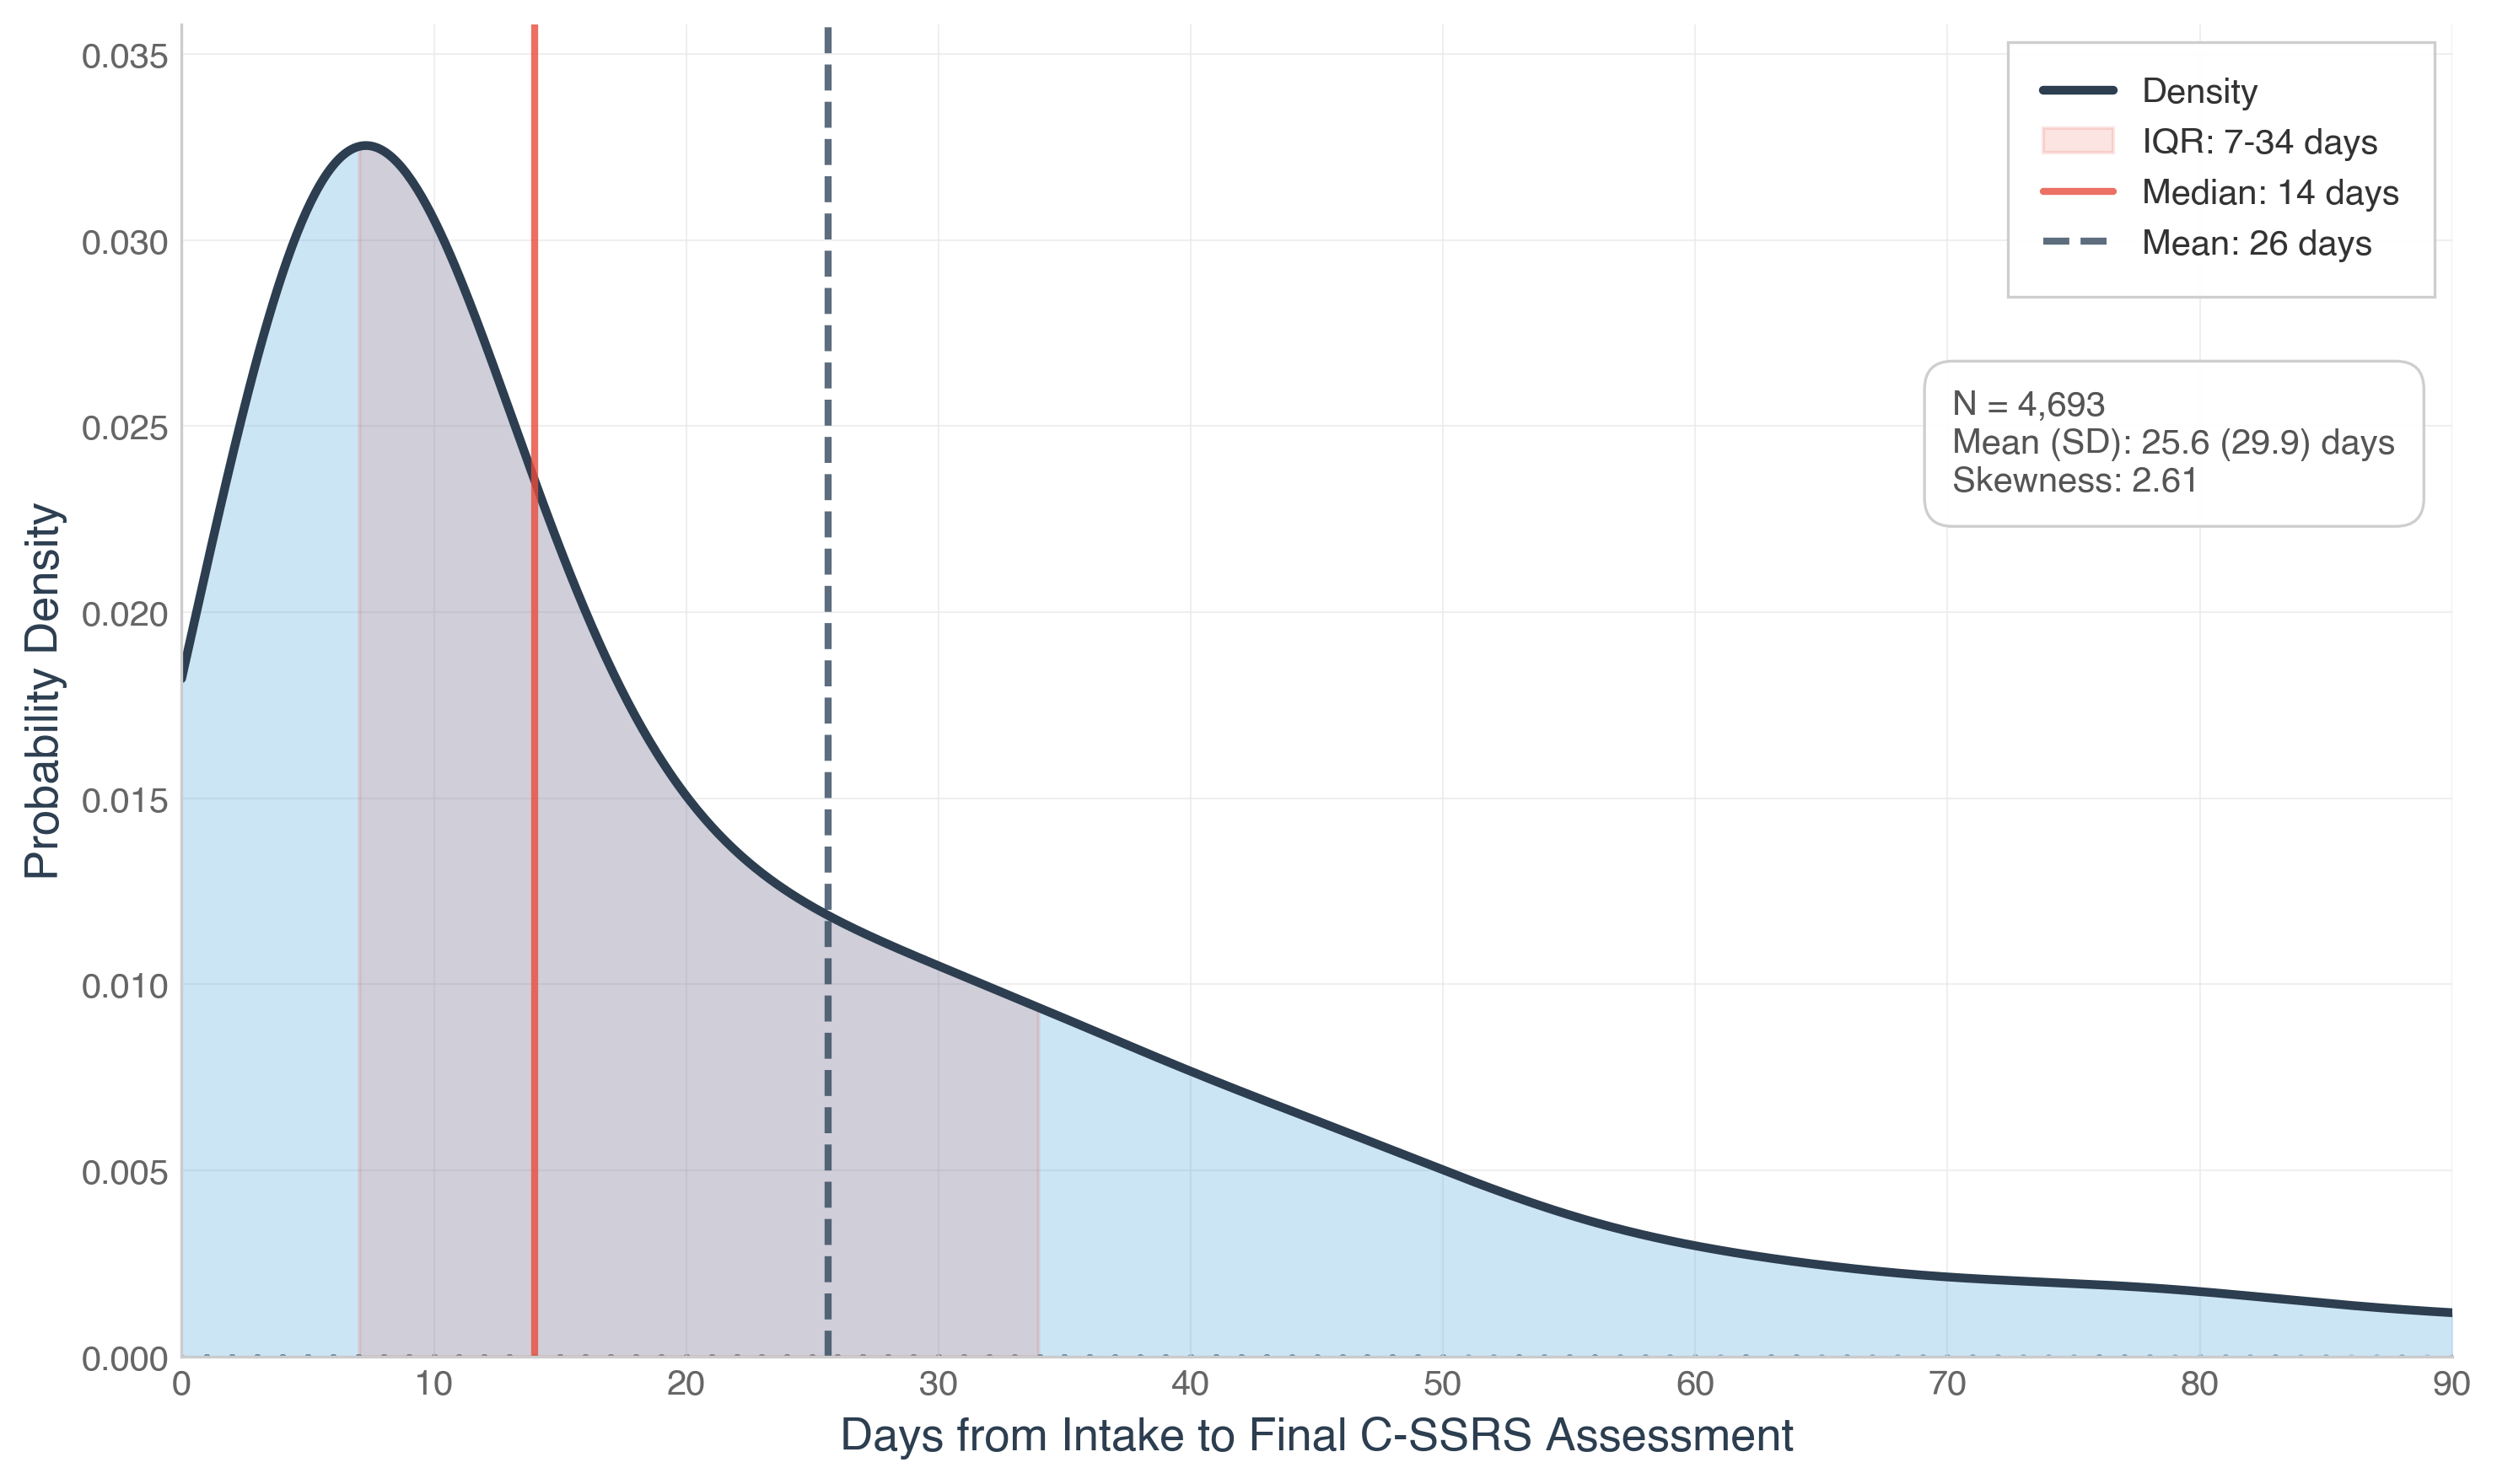

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd

# Set the style to emulate ggplot2
sns.set_style("whitegrid", {
    'axes.edgecolor': '#CCCCCC',
    'axes.linewidth': 0.8,
    'grid.color': '#EBEBEB',
    'grid.linewidth': 1,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white'
})

# Configure for publication quality
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'],
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666'
})

# Prepare data
data = final["admit_to_last_cssrs"].dropna()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Calculate KDE
density = stats.gaussian_kde(data, bw_method='scott')
x_range = np.linspace(0, np.percentile(data, 95) + 10, 1000)
density_values = density(x_range)

# Calculate statistics
q1, median, q3 = data.quantile([0.25, 0.5, 0.75])
mean_val = data.mean()

# Main KDE plot with gradient fill
# Create gradient effect under the curve
ax.fill_between(x_range, 0, density_values, 
                color='#3498db', alpha=0.25, linewidth=0)

# Main density line
ax.plot(x_range, density_values, color='#2c3e50', linewidth=2.5, label='Density')

# Add shaded IQR region
iqr_x = x_range[(x_range >= q1) & (x_range <= q3)]
iqr_y = density(iqr_x)
ax.fill_between(iqr_x, 0, iqr_y, color='#e74c3c', alpha=0.15, 
                label=f'IQR: {q1:.0f}-{q3:.0f} days')

# Add statistical reference lines
ax.axvline(median, color='#e74c3c', linestyle='-', linewidth=2, 
           alpha=0.8, label=f'Median: {median:.0f} days')
ax.axvline(mean_val, color='#34495e', linestyle='--', linewidth=2, 
           alpha=0.8, label=f'Mean: {mean_val:.0f} days')

# Add subtle rug plot at bottom
ax.scatter(data, np.zeros(len(data)) - 0.001 * density_values.max(), 
           color='#7f8c8d', alpha=0.15, s=1, zorder=0)

# Styling
ax.set_xlabel('Days from Intake to Final C-SSRS Assessment', 
              fontsize=13, color='#2c3e50', fontweight='medium')
ax.set_ylabel('Probability Density', 
              fontsize=13, color='#2c3e50', fontweight='medium')

# Set limits
ax.set_xlim(0, np.percentile(data, 95) + 5)
ax.set_ylim(0, density_values.max() * 1.1)

# Customize grid
ax.grid(True, linestyle='-', linewidth=0.5, color='#EBEBEB', alpha=0.8)
ax.set_axisbelow(True)

# Spines customization (ggplot-style)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color('#CCCCCC')
    ax.spines[spine].set_linewidth(0.8)

# Tick customization
ax.tick_params(colors='#666666', which='both', length=0)

# Legend with custom styling
legend = ax.legend(loc='upper right', frameon=True, fancybox=False, 
                   shadow=False, borderpad=1, columnspacing=1)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#CCCCCC')
legend.get_frame().set_linewidth(0.8)
legend.get_frame().set_alpha(0.95)

# Add sample size and statistics annotation
stats_text = f'N = {len(data):,}\nMean (SD): {mean_val:.1f} ({data.std():.1f}) days\nSkewness: {stats.skew(data):.2f}'
ax.text(0.78, 0.65, stats_text, transform=ax.transAxes,
        fontsize=10, color='#555555',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', 
                  edgecolor='#CCCCCC', linewidth=0.8, alpha=0.95))

# Title (optional - remove for journal submission)
# ax.set_title('Distribution of Time to Last Suicide Risk Assessment', 
#              fontsize=14, color='#2c3e50', fontweight='bold', pad=20)

# Optimize layout
plt.tight_layout()

# Display
plt.show()

# Save in high quality
# plt.savefig('cssrs_distribution_kde.pdf', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('cssrs_distribution_kde.png', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('cssrs_distribution_kde.svg', bbox_inches='tight', facecolor='white')

In [118]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators

# --- 1. Define therapy columns and labels ---
therapy_cols = [
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_",
]

therapy_labels = {
    therapy_cols[0]: "ACT",
    therapy_cols[1]: "CBT",
    therapy_cols[2]: "DBT",
    therapy_cols[3]: "MI",
    therapy_cols[4]: "Mindfulness",
    therapy_cols[5]: "Stages of Change",
    therapy_cols[6]: "Family Systems",
    therapy_cols[7]: "Trauma-Informed",
}

# --- 2. Filter to valid rows and rename ---
filtered = final.loc[
    final["risk_level_initial"].notna()
    & final["risk_level_discharge"].notna()
    & (final[therapy_cols].sum(axis=1) > 0),
    therapy_cols
].rename(columns=therapy_labels)

# Ensure boolean
filtered = filtered.astype(bool)

In [119]:
filtered

,ACT,CBT,DBT,MI,Mindfulness,Stages of Change,Family Systems,Trauma-Informed
0,False,False,True,True,True,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,True,False
4,False,False,False,False,True,False,False,False
5,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...
7723,False,True,False,True,False,False,False,False
7728,False,True,True,False,False,False,False,False
7730,False,False,False,True,False,False,False,False
7731,False,False,False,True,False,False,False,False


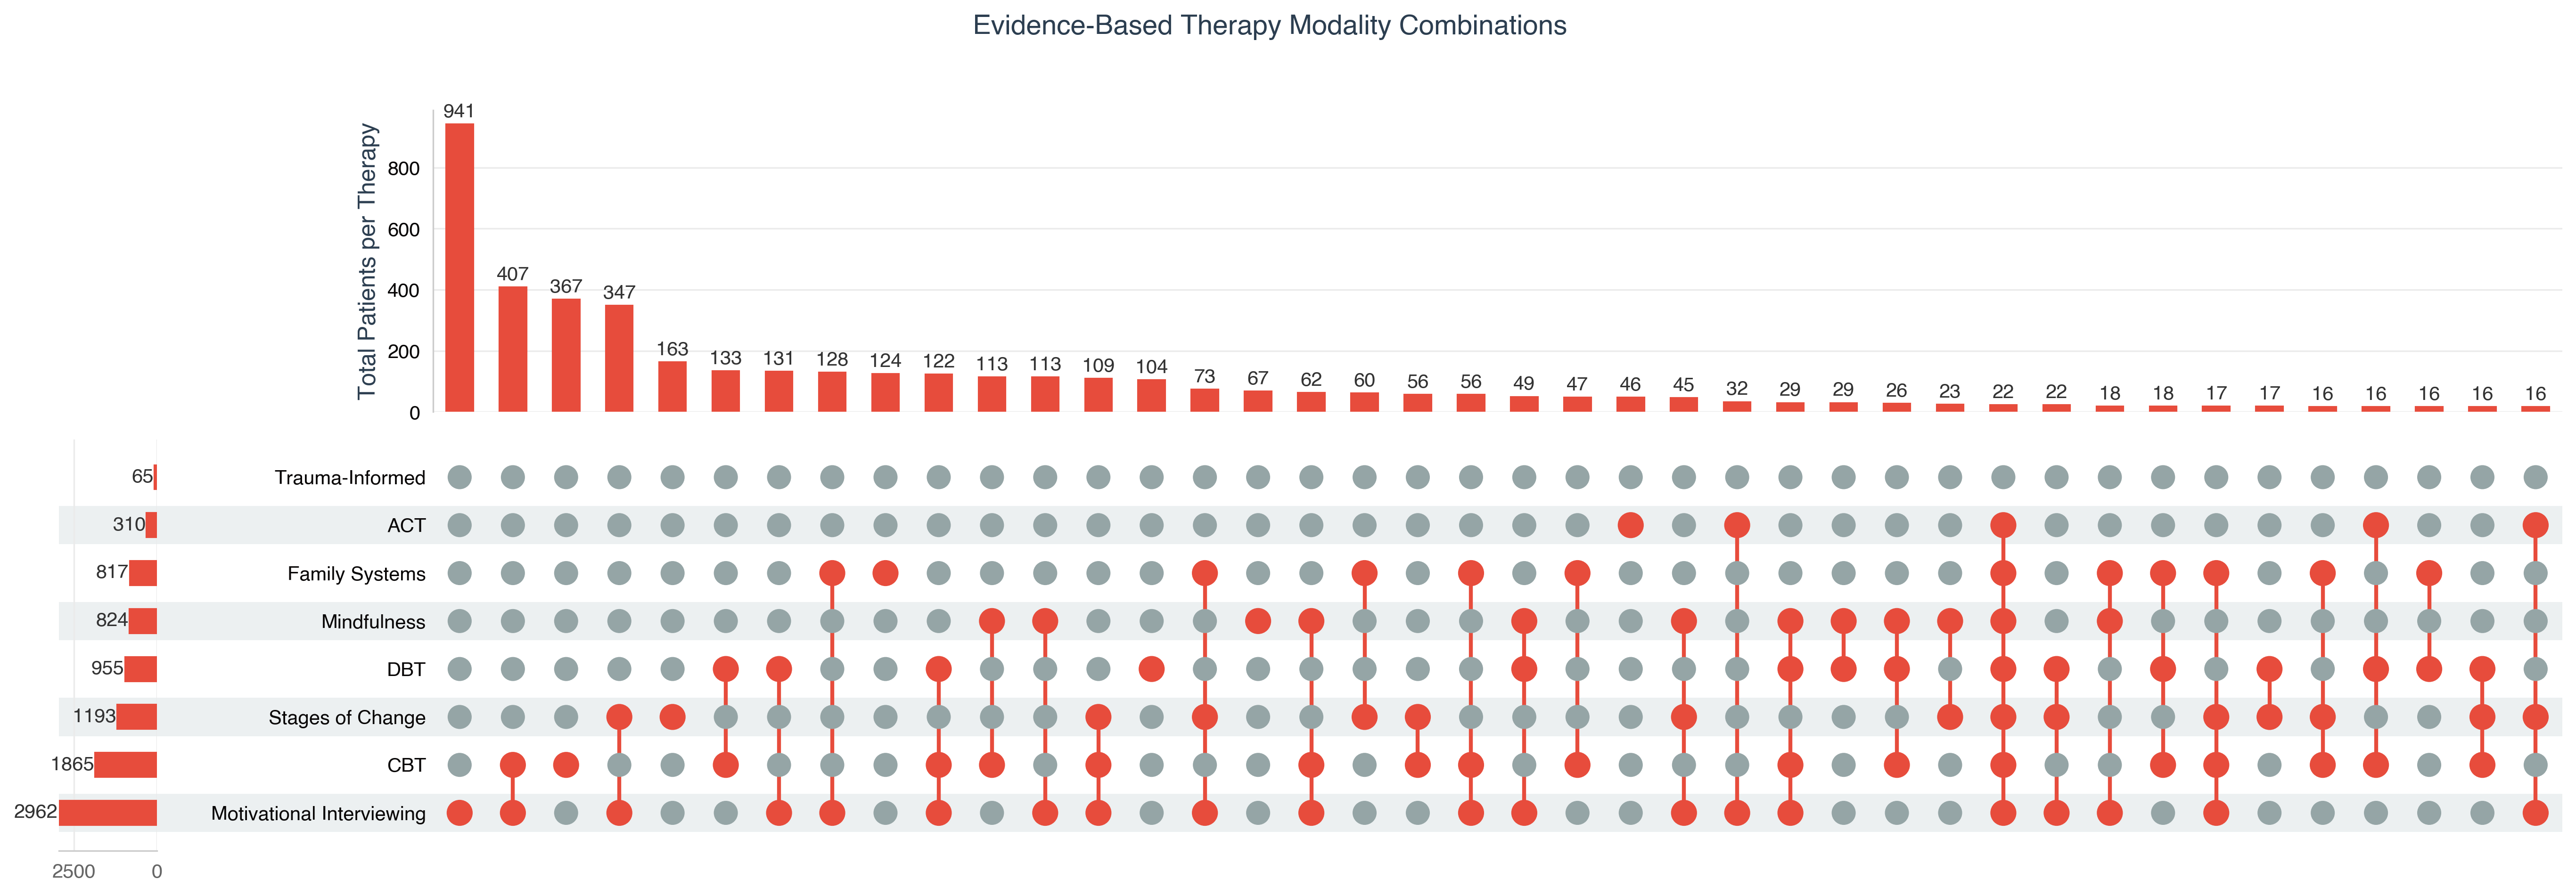

In [134]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
import numpy as np
import seaborn as sns

# Set up the style for publication quality
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'],
    'font.size': 10,
    'axes.linewidth': 0.8,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#666666',
    'ytick.color': "#090707",
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# --- 1. Define therapy columns and labels ---
therapy_cols = [
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_",
]

therapy_labels = {
    therapy_cols[0]: "ACT",
    therapy_cols[1]: "CBT",
    therapy_cols[2]: "DBT",
    therapy_cols[3]: "Motivational Interviewing",
    therapy_cols[4]: "Mindfulness",
    therapy_cols[5]: "Stages of Change",
    therapy_cols[6]: "Family Systems",
    therapy_cols[7]: "Trauma-Informed",
}

# --- 2. Filter to valid rows and rename ---
filtered = final.loc[
    final["risk_level_initial"].notna()
    & final["risk_level_discharge"].notna()
    & (final[therapy_cols].sum(axis=1) > 0),
    therapy_cols
].rename(columns=therapy_labels)

# Ensure boolean
filtered = filtered.astype(bool)

# --- 3. Create the UpSet data structure ---
upset_data = from_indicators(filtered)

# --- 4. Create the UpSet plot with custom styling ---
fig = plt.figure(figsize=(14, 8), facecolor='white', dpi=300)

# Initialize UpSet with custom parameters
upset = UpSet(
    upset_data,
    subset_size='count',
    intersection_plot_elements=6,  # Show more intersections
    min_subset_size=15,  # Only show combinations with at least 10 patients
    min_degree=1,  # Show single therapies too
    max_degree=None,  # No maximum
    sort_by='cardinality',  # Sort by frequency
    sort_categories_by='cardinality',  # Sort categories by total frequency
    facecolor='#e74c3c',  # Nice red color for bars
    shading_color='#ecf0f1',  # Light gray for matrix
    other_dots_color='#95a5a6',  # Gray for inactive dots
    element_size=35,  # Size of the matrix dots
    show_counts=True,  # Show counts on bars
    show_percentages=False,  # Can change to True if you want percentages
)

# Plot with custom styling
axes = upset.plot(fig=fig)

# Customize the intersection size plot (main bar chart)
for ax in fig.axes:
    # Style the bar chart
    if hasattr(ax, 'set_xlabel'):
        if ax.get_xlabel() == 'Intersection size' or 'size' in ax.get_xlabel().lower():
            ax.set_xlabel('Number of Patients', fontsize=12, fontweight='medium', color='#2c3e50')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('#CCCCCC')
            ax.spines['bottom'].set_color('#CCCCCC')
            ax.grid(True, axis='y', linestyle='-', linewidth=0.5, color='#EBEBEB', alpha=0.8)
            ax.set_axisbelow(True)
            
            # Add value labels on top of bars (if not too many)
            bars = [child for child in ax.get_children() if isinstance(child, plt.Rectangle)]
            for bar in bars[:20]:  # Only label first 20 bars to avoid clutter
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=8, color='#666666')
    
    # Style the totals plot (side bar chart)
    if hasattr(ax, 'set_ylabel'):
        if ax.get_ylabel() == 'Set size' or 'size' in ax.get_ylabel().lower():
            ax.set_ylabel('Total Patients per Therapy', fontsize=12, fontweight='medium', color='#2c3e50')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('#CCCCCC')
            ax.spines['bottom'].set_color('#CCCCCC')
            ax.grid(True, axis='x', linestyle='-', linewidth=0.5, color='#EBEBEB', alpha=0.8)
            ax.set_axisbelow(True)

# Add a title
fig.suptitle('Evidence-Based Therapy Modality Combinations', 
             fontsize=14, fontweight='bold', color='#2c3e50', y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display
plt.show()

# Save options
# plt.savefig('therapy_combinations_upset.pdf', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('therapy_combinations_upset.png', dpi=300, bbox_inches='tight', facecolor='white')

In [ ]:
#make sure that final has an initial risk level value, that final has a discharge risk level value, and that at least one therapy modality is recorded

final = final.loc[
    final["risk_level_initial"].notna()
    & final["risk_level_discharge"].notna()
    & (final[therapy_cols].sum(axis=1) > 0)
].rename(columns=therapy_labels)

final

,masterid,admit_date,discharge_date,final_eval_date,risk_level_discharge,risk_level_initial,days_to_first_drop,days_until_low,rescreens,admit_to_last_cssrs,...,pn_eval_date,therapist_name,ACT,CBT,DBT,Motivational Interviewing,Mindfulness,Stages of Change,Family Systems,Trauma-Informed
0,0009f7ed-2349-4f4a-9b04-9b194ff434ea,2023-08-29,2023-09-18,2023-09-01 14:25:00,Low,Moderate,3,3,1,3,...,2023-09-01 11:00:00,Tianna McIff,0,0,1,1,1,0,0,0
2,00178ab1-b7ac-43b2-a190-94924191948a,2022-05-26,2022-07-06,2022-07-05 15:26:00,Low,Moderate,7,7,3,40,...,2022-06-01 11:30:00,Martha Ramirez,0,0,0,1,0,0,0,0
3,001988a9-62ae-4ce0-a1a2-84e8c7be1f48,2022-11-29,2023-02-17,2022-12-27 15:24:00,Low,Moderate,28,28,1,28,...,2022-12-08 14:30:00,Lola (Sarah) Schwitkis,0,0,0,1,0,0,1,0
4,001ef185-374e-4052-8f0d-5b7665f9de9c,2022-08-10,2022-09-30,2022-09-27 12:37:00,Moderate,Moderate,23,23,8,48,...,2022-08-12 12:30:00,Delphine Chollet,0,0,0,0,1,0,0,0
5,0028f28c-4a54-40df-8551-b28640dd4aa2,2023-07-03,2023-08-31,2023-08-31 16:11:00,Low,Moderate,7,7,9,59,...,2023-07-10 15:30:00,Victoria Cole,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,ff75d5c7-629d-4c53-a01c-b57e5754ae7d,2023-01-16,2023-07-06,2023-06-01 16:17:00,Low,High,1,8,15,136,...,2023-01-17 10:00:00,Ruth Nunez,0,1,0,1,0,0,0,0
7728,ffc7f41d-cc84-49fc-af3f-f80567317f2b,2021-12-09,2022-02-04,2021-12-20 15:23:00,Low,High,4,11,3,11,...,2021-12-14 15:00:00,Ashlyn Taylor,0,1,1,0,0,0,0,0
7730,ffddec32-6fcc-461c-9bfa-ce79b838c1dd,2022-02-17,2022-04-29,2022-02-25 15:47:00,Low,Moderate,8,8,1,8,...,2022-02-25 15:30:00,Natalie Jones,0,0,0,1,0,0,0,0
7731,ffe569e8-c1a6-41c7-b4d8-4b78917aa663,2022-03-04,2022-04-18,2022-04-18 16:57:00,Low,Moderate,14,14,5,45,...,2022-03-07 17:30:00,Ashlyn Taylor,0,0,0,1,0,0,0,0


In [ ]:
final["improve"] = (final["risk_level_discharge"].cat.codes < final["risk_level_initial"].cat.codes).astype(int)
final["improve"] = final["improve"].astype(int)

final

,masterid,admit_date,discharge_date,final_eval_date,risk_level_discharge,risk_level_initial,days_to_first_drop,days_until_low,rescreens,admit_to_last_cssrs,...,therapist_name,evidence_based_modalities_employed_act,evidence_based_modalities_employed_cbt,evidence_based_modalities_employed_dbt,evidence_based_modalities_employed_motivational_interviewing,evidence_based_modalities_employed_mindfulness_techniques,evidence_based_modalities_employed_stages_of_change,evidence_based_modalities_employed_family_systems,evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_,improve
0,0009f7ed-2349-4f4a-9b04-9b194ff434ea,2023-08-29,2023-09-18,2023-09-01 14:25:00,Low,Moderate,3,3,1,3,...,Tianna McIff,0,0,1,1,1,0,0,0,1
2,00178ab1-b7ac-43b2-a190-94924191948a,2022-05-26,2022-07-06,2022-07-05 15:26:00,Low,Moderate,7,7,3,40,...,Martha Ramirez,0,0,0,1,0,0,0,0,1
3,001988a9-62ae-4ce0-a1a2-84e8c7be1f48,2022-11-29,2023-02-17,2022-12-27 15:24:00,Low,Moderate,28,28,1,28,...,Lola (Sarah) Schwitkis,0,0,0,1,0,0,1,0,1
4,001ef185-374e-4052-8f0d-5b7665f9de9c,2022-08-10,2022-09-30,2022-09-27 12:37:00,Moderate,Moderate,23,23,8,48,...,Delphine Chollet,0,0,0,0,1,0,0,0,0
5,0028f28c-4a54-40df-8551-b28640dd4aa2,2023-07-03,2023-08-31,2023-08-31 16:11:00,Low,Moderate,7,7,9,59,...,Victoria Cole,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,ff75d5c7-629d-4c53-a01c-b57e5754ae7d,2023-01-16,2023-07-06,2023-06-01 16:17:00,Low,High,1,8,15,136,...,Ruth Nunez,0,1,0,1,0,0,0,0,1
7728,ffc7f41d-cc84-49fc-af3f-f80567317f2b,2021-12-09,2022-02-04,2021-12-20 15:23:00,Low,High,4,11,3,11,...,Ashlyn Taylor,0,1,1,0,0,0,0,0,1
7730,ffddec32-6fcc-461c-9bfa-ce79b838c1dd,2022-02-17,2022-04-29,2022-02-25 15:47:00,Low,Moderate,8,8,1,8,...,Natalie Jones,0,0,0,1,0,0,0,0,1
7731,ffe569e8-c1a6-41c7-b4d8-4b78917aa663,2022-03-04,2022-04-18,2022-04-18 16:57:00,Low,Moderate,14,14,5,45,...,Ashlyn Taylor,0,0,0,1,0,0,0,0,1
